# Exercise 1. A multilayer perceptron network

## Learning goals

The goal of this exercise is to get familiar with the basics of PyTorch and train a simple feedforward network on a real-world data set. If you are not familiar with PyTorch, there is a number of good tutorials [here](https://pytorch.org/tutorials/index.html). We recommend the following ones:
* [What is PyTorch?](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
* [Autograd: Automatic Differentiation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)
* [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
* [Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)

This exercise consists of several tasks which require some background knowledge of basic ML models.

In [1]:
skip_training = True  # Set this flag to True before validation and submission

In [2]:
# During evaluation, this cell sets skip_training to True
# skip_training = True

In [3]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    # course_data_dir = ...
    # YOUR CODE HERE
    raise NotImplementedError()

print('The data directory is %s' % course_data_dir)

The data directory is /coursedata


In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
# Select device which you are going to use for training
device = torch.device("cpu")

In [6]:
if skip_training:
    # The models are always evaluated on CPU
    device = torch.device("cpu")

## Data

We are going to use *winequality* dataset which contains red and white vinho verde wine samples rated by experts from 0 to 10 (obtained from [here](https://archive.ics.uci.edu/ml/datasets/wine+quality)). We will transform the task into a binary classification problem and try to predict if the quality of wine is greater or lower than 7. The idea is to compare the quality of predictions obtained by a random forest classfier and a simple neural network.

Let us load the data and split it into the training and test sets.

In [7]:
data_dir = os.path.join(course_data_dir, 'winequality')
print('Data loaded from %s' % data_dir)

df = pd.concat([
    pd.read_csv(os.path.join(data_dir, 'winequality-red.csv'), delimiter=';'),
    pd.read_csv(os.path.join(data_dir, 'winequality-white.csv'), delimiter=';')
])

x = df.loc[:, df.columns != 'quality'].values
y = df['quality'].values >= 7  # Convert to a binary classification problem

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Data loaded from /coursedata/winequality


## Train a Random forest classifier

*In the code below, train a random forest classifier from sklearn (look at the description [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) using `x_train` and `y_train` with 100 trees. Name your classifier object `classifier`.*

In [8]:
from sklearn.ensemble import RandomForestClassifier 

# classifier = ...
# YOUR CODE HERE
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

print(classifier.feature_importances_)
print(classifier.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

#raise NotImplementedError()

[ 0.06627359  0.09031844  0.07708119  0.08215981  0.08724307  0.0771777
  0.07972623  0.1145798   0.08106524  0.07956871  0.16480621]
[0]


Accuracy of random forest: 0.89

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1064
           1       0.78      0.58      0.67       236

   micro avg       0.89      0.89      0.89      1300
   macro avg       0.85      0.77      0.80      1300
weighted avg       0.89      0.89      0.89      1300



Text(15,0.5,'true labels')

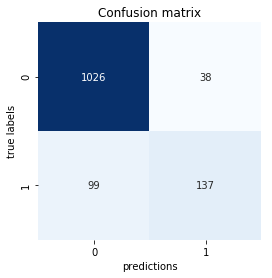

In [9]:
# Compute the accuracy of the random forest classifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

pred_test = classifier.predict(x_test)  # Predict labels of test data using the trained classifier
c_matrix = confusion_matrix(y_test, pred_test) 

rf_accuracy = accuracy_score(y_test, pred_test)
print("Accuracy of random forest: {:.2f}".format(rf_accuracy))
print("\nClassification report:")
print(classification_report(y_test, pred_test))

fig, ax = plt.subplots(1, figsize=(4, 4))
ax.set_title("Confusion matrix")
sns.heatmap(c_matrix, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.set_xlabel('predictions')
ax.set_ylabel('true labels')

As you can see, the random forest classifier works quite nicely in this task without much tuning.

## A multilayer perceptron (MLP) network with two hidden layers

In the code below, define a neural network architecture with:
- input dimensionality 11
- one hidden layer with 100 units with ReLU nonlinearity
- one hidden layer with 100 units with ReLU nonlinearity
- linear output layer with output dimensionality 2.

**Please do not use [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential) in your code.**

You may want to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) for reference.

In [20]:
n_inputs = 11
hidden_layer_units = 100
output_dimensionality = 2

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # YOUR CODE HERE
        self.lin1 = nn.Linear(n_inputs, hidden_layer_units)
        self.lin2 = nn.Linear(hidden_layer_units, hidden_layer_units)
        self.lin3 = nn.Linear(hidden_layer_units, output_dimensionality)
        
        #raise NotImplementedError()

    def forward(self, x):
        # YOUR CODE HERE
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = self.lin3(x)
        return x
        
        #raise NotImplementedError()

In [21]:
# Let us create the network and make sure it can process a random input of the right shape
mlp = MLP()
y = mlp(torch.randn(10, n_inputs))
assert y.shape == torch.Size([10, 2]), "Bad shape of y: y.shape={}".format(y.shape)

In [22]:
mlp

MLP(
  (lin1): Linear(in_features=11, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=2, bias=True)
)

One can also create an instance of a simple deep network using [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential).

In the cell below, please use [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential)
to create an MLP with the same structure as above.

In [23]:
# This function should return an MLP model created with torch.nn.Sequential
# - input dimensionality 11
# - one hidden layer with 100 units with ReLU nonlinearity
# - one hidden layer with 100 units with ReLU nonlinearity
# - linear output layer with output dimensionality 2.
# mlp_seq = nn.Sequential(...
# YOUR CODE HERE
mlp_seq = nn.Sequential(nn.Linear(n_inputs, hidden_layer_units), nn.ReLU(),
                        nn.Linear(hidden_layer_units, hidden_layer_units), nn.ReLU(),
                        nn.Linear(hidden_layer_units, output_dimensionality))

#raise NotImplementedError()

In [24]:
# Print the network
print(mlp_seq)

Sequential(
  (0): Linear(in_features=11, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [25]:
# Let us feed a random input of the right shape to the network created with torch.nn.Sequential.
y = mlp_seq(torch.randn(10, n_inputs))
assert y.shape == torch.Size([10, 2]), "Bad shape of y: y.shape={}".format(y.shape)

## Train an MLP network

Next we will train the multilayer perceptron network. For better understanding of the training process you can take a look at [this part of the tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop).

### Data scaling

Even though deep learning is supposed to work well on raw data without much feature engineering, it is usually a good idea to pre-process data so that the inputs have zero mean and unit standard deviation. PyTorch has its own tools for preprocessing but let us use sklearn's `StandardScaler` for now.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Training loop

Let us implement the training loop. We will use the Adam optimizer with learning rate 0.01 and we will process the data in the full-batch model (without splitting the data into mini-batches).

*Your task is to insert the missing code. You may find it useful to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).*
Your should have the following steps:
* Transform `x_train_scaled` and `y_train` to `torch.tensor`, make sure the tensors have proper types and they go to the specified `device`.
* Set all gradient values to zeros.
* Calculate outputs of the MLP network (call them `outputs`).
* Calculate cross entropy loss using [`torch.nn.functional.cross_entropy`](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.cross_entropy).
* Backpropagate the loss: compute the gradients of the loss wrt to all the parameters of the MLP.
* Update the parameters of the model using the `optimizer`.

In [27]:
mlp = MLP()
mlp.to(device)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.005)
n_epochs = 1000

train_accuracy_history = []
test_accuracy_history = []



x_train_scaled_tensor = torch.tensor(x_train_scaled, dtype=torch.float)
y_train_tensor = torch.tensor(y_train)
for epoch in range(n_epochs):
    # - You need to specify dtype when converting data to torch.tensor
    # - Call the outputs of the model "outputs" like in the line below
    # outputs =  mlp.forward(...)
    # YOUR CODE HERE
    optimizer.zero_grad()
    outputs = mlp(x_train_scaled_tensor)
    loss = F.cross_entropy(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    
    #raise NotImplementedError()
    
    if skip_training:
        break

    if (epoch % 1) == 0:
        # Store the progress of training
        with torch.no_grad():
            # outputs is the output of the model produced with forward function
            logits = outputs.cpu().data.numpy()
            pred_train = logits.argmax(axis=1)
            train_accuracy = accuracy_score(pred_train, y_train)

            # Compute test error
            x = torch.tensor(x_test_scaled, device=device, dtype=torch.float)
            outputs = mlp.forward(x)
            logits = outputs.cpu().data.numpy()
            pred_test = logits.argmax(axis=1)
            test_accuracy = accuracy_score(pred_test, y_test)
            train_accuracy_history.append(train_accuracy)
            test_accuracy_history.append(test_accuracy)
            print('Train Epoch {}: Loss: {:.6f} Train accuracy {:.2f} Test accuracy {:.2f}'.format(
                epoch, loss.item(), train_accuracy, test_accuracy))

Train Epoch 0: Loss: 0.740367 Train accuracy 0.27 Test accuracy 0.82
Train Epoch 1: Loss: 0.586770 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 2: Loss: 0.510217 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 3: Loss: 0.486345 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 4: Loss: 0.487904 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 5: Loss: 0.485306 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 6: Loss: 0.471999 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 7: Loss: 0.454140 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 8: Loss: 0.438104 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 9: Loss: 0.426995 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 10: Loss: 0.420718 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 11: Loss: 0.417463 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 12: Loss: 0.415271 Train accuracy 0.80 Test accuracy 0.83
Train Epoch 13: Loss: 0.412850 Train accuracy 0.81 Test accuracy 0.83
Train Epoch 14: Loss: 0.409618

Train Epoch 119: Loss: 0.277915 Train accuracy 0.87 Test accuracy 0.84
Train Epoch 120: Loss: 0.276309 Train accuracy 0.87 Test accuracy 0.84
Train Epoch 121: Loss: 0.275649 Train accuracy 0.87 Test accuracy 0.84
Train Epoch 122: Loss: 0.274431 Train accuracy 0.88 Test accuracy 0.84
Train Epoch 123: Loss: 0.272592 Train accuracy 0.88 Test accuracy 0.85
Train Epoch 124: Loss: 0.271432 Train accuracy 0.88 Test accuracy 0.84
Train Epoch 125: Loss: 0.270308 Train accuracy 0.88 Test accuracy 0.84
Train Epoch 126: Loss: 0.269275 Train accuracy 0.88 Test accuracy 0.85
Train Epoch 127: Loss: 0.268076 Train accuracy 0.88 Test accuracy 0.84
Train Epoch 128: Loss: 0.266376 Train accuracy 0.88 Test accuracy 0.84
Train Epoch 129: Loss: 0.265014 Train accuracy 0.88 Test accuracy 0.85
Train Epoch 130: Loss: 0.263973 Train accuracy 0.88 Test accuracy 0.85
Train Epoch 131: Loss: 0.262844 Train accuracy 0.88 Test accuracy 0.85
Train Epoch 132: Loss: 0.261935 Train accuracy 0.88 Test accuracy 0.85
Train 

Train Epoch 243: Loss: 0.159342 Train accuracy 0.93 Test accuracy 0.86
Train Epoch 244: Loss: 0.159062 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 245: Loss: 0.158250 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 246: Loss: 0.157457 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 247: Loss: 0.156791 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 248: Loss: 0.155762 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 249: Loss: 0.154824 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 250: Loss: 0.154255 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 251: Loss: 0.153631 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 252: Loss: 0.153078 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 253: Loss: 0.152897 Train accuracy 0.95 Test accuracy 0.86
Train Epoch 254: Loss: 0.153146 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 255: Loss: 0.154010 Train accuracy 0.95 Test accuracy 0.86
Train Epoch 256: Loss: 0.155189 Train accuracy 0.94 Test accuracy 0.86
Train 

Train Epoch 360: Loss: 0.103973 Train accuracy 0.96 Test accuracy 0.86
Train Epoch 361: Loss: 0.104196 Train accuracy 0.96 Test accuracy 0.86
Train Epoch 362: Loss: 0.103273 Train accuracy 0.96 Test accuracy 0.86
Train Epoch 363: Loss: 0.102260 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 364: Loss: 0.101531 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 365: Loss: 0.101116 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 366: Loss: 0.101354 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 367: Loss: 0.101541 Train accuracy 0.96 Test accuracy 0.86
Train Epoch 368: Loss: 0.101092 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 369: Loss: 0.099972 Train accuracy 0.96 Test accuracy 0.86
Train Epoch 370: Loss: 0.099090 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 371: Loss: 0.098760 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 372: Loss: 0.098749 Train accuracy 0.97 Test accuracy 0.86
Train Epoch 373: Loss: 0.098730 Train accuracy 0.97 Test accuracy 0.86
Train 

Train Epoch 476: Loss: 0.072538 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 477: Loss: 0.072493 Train accuracy 0.98 Test accuracy 0.85
Train Epoch 478: Loss: 0.072937 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 479: Loss: 0.072220 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 480: Loss: 0.071118 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 481: Loss: 0.069203 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 482: Loss: 0.068038 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 483: Loss: 0.067943 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 484: Loss: 0.068022 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 485: Loss: 0.068072 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 486: Loss: 0.068322 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 487: Loss: 0.069080 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 488: Loss: 0.068848 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 489: Loss: 0.068282 Train accuracy 0.98 Test accuracy 0.86
Train 

Train Epoch 598: Loss: 0.046602 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 599: Loss: 0.045982 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 600: Loss: 0.045587 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 601: Loss: 0.044893 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 602: Loss: 0.044181 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 603: Loss: 0.043722 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 604: Loss: 0.043720 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 605: Loss: 0.043947 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 606: Loss: 0.044053 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 607: Loss: 0.044174 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 608: Loss: 0.044246 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 609: Loss: 0.044700 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 610: Loss: 0.044762 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 611: Loss: 0.045135 Train accuracy 0.99 Test accuracy 0.87
Train 

Train Epoch 716: Loss: 0.028336 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 717: Loss: 0.028375 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 718: Loss: 0.028437 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 719: Loss: 0.028519 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 720: Loss: 0.028471 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 721: Loss: 0.028383 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 722: Loss: 0.028154 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 723: Loss: 0.027911 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 724: Loss: 0.027633 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 725: Loss: 0.027432 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 726: Loss: 0.027275 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 727: Loss: 0.027182 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 728: Loss: 0.027144 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 729: Loss: 0.027166 Train accuracy 1.00 Test accuracy 0.87
Train 

Train Epoch 836: Loss: 0.018402 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 837: Loss: 0.018376 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 838: Loss: 0.018399 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 839: Loss: 0.018448 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 840: Loss: 0.018554 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 841: Loss: 0.018561 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 842: Loss: 0.018596 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 843: Loss: 0.018442 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 844: Loss: 0.018279 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 845: Loss: 0.018014 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 846: Loss: 0.017815 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 847: Loss: 0.017708 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 848: Loss: 0.017682 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 849: Loss: 0.017716 Train accuracy 1.00 Test accuracy 0.87
Train 

Train Epoch 956: Loss: 0.012552 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 957: Loss: 0.012557 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 958: Loss: 0.012504 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 959: Loss: 0.012454 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 960: Loss: 0.012359 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 961: Loss: 0.012276 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 962: Loss: 0.012208 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 963: Loss: 0.012158 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 964: Loss: 0.012129 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 965: Loss: 0.012113 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 966: Loss: 0.012125 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 967: Loss: 0.012149 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 968: Loss: 0.012191 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 969: Loss: 0.012156 Train accuracy 1.00 Test accuracy 0.87
Train 

In [28]:
x_train_scaled

array([[-0.70918774, -1.27826323,  0.70309086, ..., -0.55368838,
         1.24844576,  0.59096275],
       [ 0.13982666,  1.63495282, -2.12126847, ...,  1.62899005,
         0.78236054, -0.58582052],
       [-0.63200461, -0.36788322, -0.33021133, ..., -0.49132614,
        -0.48272792, -1.51043595],
       ..., 
       [-0.16890585, -0.67134322,  0.70309086, ...,  1.75371453,
         0.38285892, -0.24959673],
       [-0.0145396 ,  1.75633682, -2.19015528, ...,  0.9430054 ,
         0.31627532, -1.25826811],
       [-1.1722865 , -0.73203522, -0.67464539, ...,  0.13229627,
        -0.34956071, -1.25826811]])

The accuracy should be comparable to the accuracy of the random forest classifier.

In [29]:
# Save the network to a file, submit this file together with your notebook
filename = '1_mlp.pth'
if not skip_training:
    try:
        do_save = input('Do you want to save the model (type yes to confirm)? ').lower()
        if do_save == 'yes':
            torch.save(mlp.state_dict(), filename)
            print('Model saved to %s' % filename)
        else:
            print('Model not saved')
    except:
        raise Exception('The notebook should be run or validated with skip_training=False.')
else:
    mlp = MLP()
    mlp.load_state_dict(torch.load(filename, map_location=lambda storage, loc: storage))
    print('Model loaded from %s' % filename)
    mlp = mlp.to(device)
    mlp.eval()

Do you want to save the model (type yes to confirm)? yes
Model saved to 1_mlp.pth


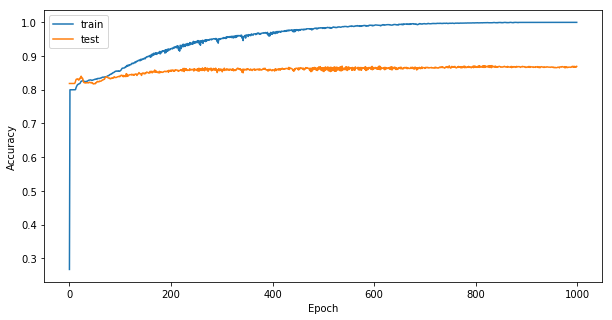

In [30]:
# Let us plot the accuracies during training
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(train_accuracy_history, label='train')
ax.plot(test_accuracy_history, label='test')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epoch")
ax.legend()


Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1064
           1       0.64      0.63      0.64       236

   micro avg       0.87      0.87      0.87      1300
   macro avg       0.78      0.78      0.78      1300
weighted avg       0.87      0.87      0.87      1300



Text(15,0.5,'true labels')

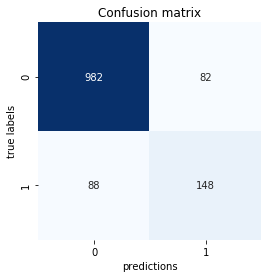

In [31]:
# Let's print the classification report and plot the confusion matrix similarly to the random forest classifier.
print("\nClassification report:")
print(classification_report(y_test, pred_test))

c_matrix = confusion_matrix(y_test, pred_test)
fig, ax = plt.subplots(1, figsize=(4, 4))
ax.set_title("Confusion matrix")
sns.heatmap(c_matrix, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.set_xlabel('predictions')
ax.set_ylabel('true labels')

Note that even though the random forest classifier may have better performance, the performance of the MLP network may be improved by tuning the hyperparameters, such as:
* number of hidden units
* number of layers
* learning rate schedule
* regularization methods.

The message from this exercise is that in simple problems that do not have spatial (like in images) or temporal (like in time series) structure, alternative classifiers (like random forests) may do very well.

## Define an MLP with an arbitrary number of layers

Let us now define a multilayer perceptron with an arbitrary number of layers and arbitrary number of neurons in each layer, so that an MLP can be created as follows:
```python
> mlp = FancyMLP([11, 150, 100, 50, 2], activation_fn=F.tanh)
```
In the example above, we created a network with three hidden layers: 150 units in the first hidden layer, 100 units in the second one and 50 units in the third one.

Note: The same activation function should be applied to all the layers except for the last one. This way the MLP can be used either for regression or classification.

Hints:
* You may find it useful to use function [`torch.nn.Module.add_module`](https://pytorch.org/docs/master/nn.html#torch.nn.Module.add_module) or class [`torch.nn.ModuleList`](https://pytorch.org/docs/stable/nn.html#torch.nn.ModuleList).
* Check how many trainable parameters a created MLP has.

In [32]:
class FancyMLP(nn.Module):
    def __init__(self, sizes, activation_fn=torch.tanh):
        """Multilayer perceptron with an arbitrary number of layers.
        
        Args:
          sizes (list):             Number of units in each layer including the input and the output layer:
                                    [n_inputs, n_units_in_hidden_layer1, ..., n_units_in_hidden_layerN, n_outputs]
          activation_fn (callable): An element-wise function used in every layer except in the last one.
        """
        # YOUR CODE HERE
        super(FancyMLP, self).__init__()
        ##self.linears = nn.ModuleList([nn.Linear(sizes) for i in range(len(sizes)-1)])
        ##self.out = nn.Linear(sizes[-2], sizes[-1])
        self.n_layers = nn.ModuleList()
        for i in range(len(sizes) - 2):
            self.n_layers.append(nn.Linear(sizes[i], sizes[i+1]))       
        self.output_layer = nn.Linear(sizes[-2], sizes[-1])
        
        #raise NotImplementedError()

    def forward(self, x):
        # YOUR CODE HERE
        #for i, l in enumerate(self.linears):
        #    #x = self.linears[i // 2](x) + l(x)
        #    x = activation_fn(self.linears(x))
        #x = self.out(x)
        for layer in self.n_layers:
            x = layer(x)
            x = torch.tanh(x)
        x = self.output_layer(x)
        return x
        
        #raise NotImplementedError()

In [33]:
# Let us now test your class
mlp = FancyMLP([n_inputs, 100, 50, 2])
y = mlp(torch.randn(10, n_inputs))
assert y.shape == torch.Size([10, 2]), "Bad shape of y: y.shape={}".format(y.shape)

mlp = FancyMLP([3, 10, 30, 40, 50, 5])
y = mlp(torch.randn(10, 3))
assert y.shape == torch.Size([10, 5]), "Bad shape of y: y.shape={}".format(y.shape)

In [34]:
# Print the MLP
mlp

FancyMLP(
  (n_layers): ModuleList(
    (0): Linear(in_features=3, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=40, bias=True)
    (3): Linear(in_features=40, out_features=50, bias=True)
  )
  (output_layer): Linear(in_features=50, out_features=5, bias=True)
)